In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import time

import mantaray

from src import *

In [241]:
ds = xr.open_dataset('/Users/gwen29360/Desktop/POSTDOC/LEGOS/ODYSEA/data/composite/eddy_4_ray_tracing.nc')


num_points = 200

In [253]:
ucur = ds.ucur_cyclonic.values.squeeze()
vcur = ds.vcur_cyclonic.values.squeeze()
ucur[np.isnan(ucur)] = 0
vcur[np.isnan(vcur)] = 0
Lon_meter = ds.x.values * 1000
Lat_meter = ds.y.values * 1000

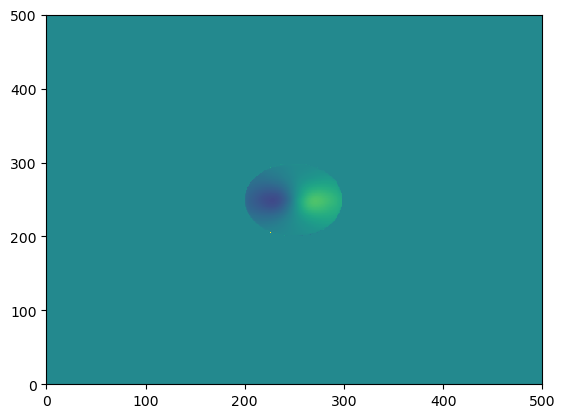

In [254]:
plt.pcolor(vcur)

In [255]:
output_file_cur = "/Users/gwen29360/Desktop/ray_tracing/data/current_composite_cyc.nc"
output_file_depth =  "/Users/gwen29360/Desktop/ray_tracing/data/bathy_composite_cyc.nc"
depth0 = 4000
create_current_forcing(Lon_meter, Lat_meter, ucur, vcur, output_file_cur, output_file_depth, depth =  depth0)


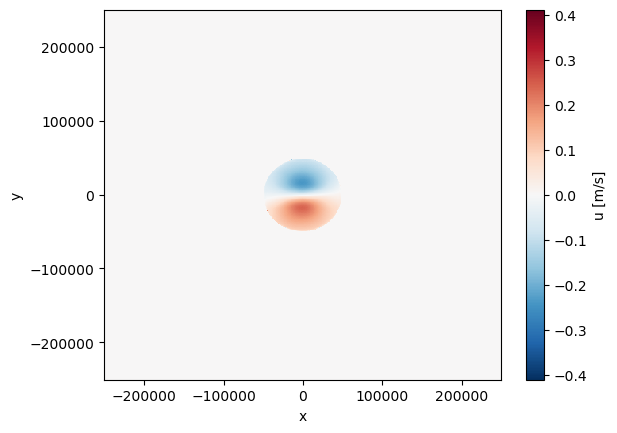

In [258]:
dd = xr.open_dataset("/Users/gwen29360/Desktop/ray_tracing/data/current_composite_cyc.nc")
dd.u.plot()

In [259]:
lambda_p = 80 # (= 10 sec waves)
incident_wave_dir = 180 * np.pi/180
k = 2*np.pi/lambda_p
depth0 = 4000

f = frequency_from_wavelength(lambda_p, depth0)
cg = group_velocity(k, f, depth0)

# Period of incident waves in seconds
T0 = 1/f

# Direction of incident waves in radians (trig convention, going to)
theta0 = incident_wave_dir
# Convert period to wavenumber magnitude
k0 = 2*np.pi/lambda_p

# Calculate wavenumber components
kx0 = k0*np.cos(theta0)
ky0 = k0*np.sin(theta0)

# Number of rays
n_rays = num_points
# Initialize wavenumber for all rays
Kx0 = kx0*np.ones(n_rays)
Ky0 = ky0*np.ones(n_rays)

# Current and bathymetry file path
current = output_file_cur
bathymetry = output_file_depth

# Read x and y from file to get domain size
# ds = xr.open_dataset(current)

x = ds.x.values*1000
y = ds.y.values*1000

# Starting points
# x0 = np.ones(100) * 5
# y0 = np.zeros(100) * 50
x0 = 150*np.ones(n_rays)*1000
y0 = np.linspace(y.min()+10, y.max()-10, n_rays)

# Estimates CFL
# Computes grid smallest spacing
dd = np.min([np.diff(x).mean(), np.diff(y).mean()])
# Computes group velocity
cg = group_velocity(k0, f, depth0)
# Computes CFL
cfl = dd/cg

duration = round(x.max()/cg)
step_size = cfl

In [260]:
bando = mantaray.ray_tracing(x0, y0, Kx0, Ky0, duration, step_size, bathymetry, current)


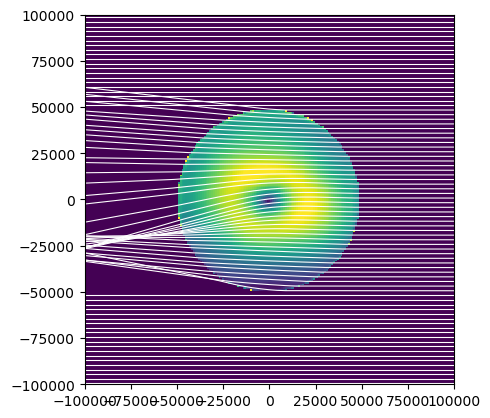

In [261]:
fig, ax = plt.subplots()

# ax.plot(x_line, y_line, color = 'w')

cs = ax.pcolormesh(Lon_meter, Lat_meter, (ds.ucur_anticyclonic**2 + ds.vcur_anticyclonic**2)**(1/2), vmin = 0, vmax = .2)
for i in range(bando.ray.size):
    ray = bando.isel(ray=i)
    ax.plot(ray.x, ray.y, 'w', lw=.78)
ax.set_xlim([-100_000, 100_000])
ax.set_ylim([-100_000, 100_000])
ax.set_aspect('equal', 'box')


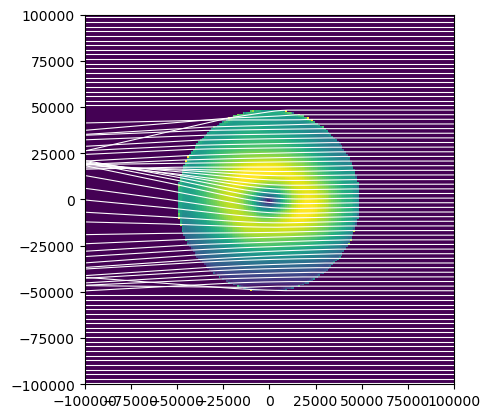

In [252]:
fig, ax = plt.subplots()

# ax.plot(x_line, y_line, color = 'w')

cs = ax.pcolormesh(Lon_meter, Lat_meter, (ds.ucur_anticyclonic**2 + ds.vcur_anticyclonic**2)**(1/2), vmin = 0, vmax = .2)
for i in range(bando.ray.size):
    ray = bando.isel(ray=i)
    ax.plot(ray.x, ray.y, 'w', lw=.78)
ax.set_xlim([-100_000, 100_000])
ax.set_ylim([-100_000, 100_000])
ax.set_aspect('equal', 'box')
